In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

# Combine the data into a single dataset

# Display the data table for preview


In [227]:
CityData_DF= pd.read_csv(city_data_to_load)
RideData_DF=pd.read_csv(ride_data_to_load)
Combined_Data=pd.merge(CityData_DF,RideData_DF, how='left',on='city')

Combined_Data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


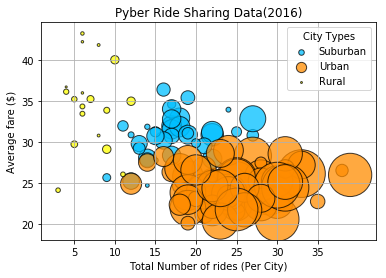

In [351]:
# Show plot
Suburban_ride=Combined_Data.loc[(Combined_Data["type"]=="Suburban")]
Urban_ride=Combined_Data.loc[(Combined_Data["type"]=="Urban")]
Rural_ride=Combined_Data.loc[(Combined_Data["type"]=="Rural")]

Suburban_ride_average_fare=Suburban_ride.groupby("city")["fare"].sum()/Suburban_ride.groupby("city")["ride_id"].count()
Urban_ride_average_fare=Urban_ride.groupby("city")["fare"].sum()/Urban_ride.groupby("city")["ride_id"].count()
Rural_ride_average_fare=Rural_ride.groupby("city")["fare"].sum()/Rural_ride.groupby("city")["ride_id"].count()


Suberban_driver=Suburban_ride.groupby("city")["driver_count"].sum()
Urban_driver=Urban_ride.groupby("city")["driver_count"].sum()
Rural_driver=Rural_ride.groupby("city")["driver_count"].sum()

plt.scatter(Suburban_ride.groupby("city")["ride_id"].count(),Suburban_ride_average_fare, c='deepskyblue',s=Suburban_ride.groupby("city")["driver_count"].sum(),alpha=0.75, edgecolor="black", label='Suburban')
plt.scatter(Urban_ride.groupby("city")["ride_id"].count(),Urban_ride_average_fare, c='darkorange',s=Urban_ride.groupby("city")["driver_count"].sum(),alpha=0.75,edgecolor="black",label='Urban') 
plt.scatter(Rural_ride.groupby("city")["ride_id"].count(),Rural_ride_average_fare, c='yellow',s=Rural_ride.groupby("city")["driver_count"].sum(),alpha=0.75,edgecolor="black", label='Rural') 
plt.legend(loc='best')


plt.xticks(np.arange(5, 40, 5))
plt.yticks(np.arange(20, 45, 5))
plt.xlabel("Total Number of rides (Per City)")
plt.ylabel("Average fare ($)")
plt.title("Pyber Ride Sharing Data(2016)")
plt.legend(title='City Types',markerscale=0.3, scatterpoints=1, fontsize=10)
plt.grid()
plt.savefig('fig1')
plt.show()


## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


<function matplotlib.pyplot.show(*args, **kw)>

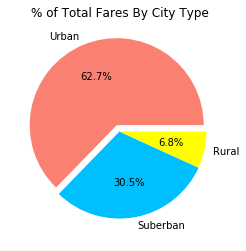

In [352]:
# Show Figure

Suburban_ride_fare=Suburban_ride["fare"].sum()
Urban_ride_fare=Urban_ride["fare"].sum()
Rural_ride_fare=Rural_ride["fare"].sum()
labels=["Urban","Suberban","Rural"]
fares_by_type=[Urban_ride_fare,Suburban_ride_fare,Rural_ride_fare]
plt.pie(fares_by_type,labels=labels, explode=[0.08,0.0,0.0], colors=["salmon","deepskyblue","yellow"],autopct='%1.1f%%')
plt.title("% of Total Fares By City Type")
plt.savefig('fig2')
plt.show

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


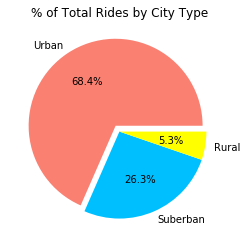

In [353]:
# Show Figure
Suburban_ride_fare=Suburban_ride["ride_id"].count()
Urban_ride_fare=Urban_ride["ride_id"].count()
Rural_ride_fare=Rural_ride["ride_id"].count()
labels=["Urban","Suberban","Rural"]
fares_by_type=[Urban_ride_fare,Suburban_ride_fare,Rural_ride_fare]
plt.pie(fares_by_type,labels=labels, explode=[0.08,0.0,0.0], colors=["salmon","deepskyblue","yellow"],autopct='%1.1f%%')
plt.title("% of Total Rides by City Type")
plt.savefig('fig3')
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


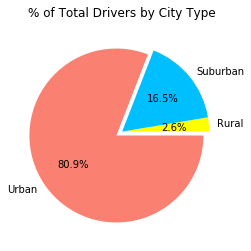

In [354]:
# Show Figure

total_drivers_perc = CityData_DF.groupby("type")["driver_count"].sum().reset_index()
total_drivers = CityData_DF["driver_count"].sum()
total_drivers_perc["Percent of Total Drivers"] = 100 * total_drivers_perc["driver_count"]/total_drivers

Total_Driver_Perc=total_drivers_perc["Percent of Total Drivers"]
newlabel=["Rural","Suburban","Urban"]

plt.pie(Total_Driver_Perc,labels=newlabel, explode=[0.00,0.0,0.08], colors=["yellow","deepskyblue","salmon"],autopct='%1.1f%%')
plt.title("% of Total Drivers by City Type")

plt.savefig('fig4')
plt.show()
